In [1]:
import pandas as pd
# from sklearn.metrics import f1_score, confusion_matrix
import sklearn.metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import os
from PIL import Image

In [2]:
df = pd.read_csv("../output/test-xception-54-class-non-merge.csv", index_col=0)
cols = df.columns
df.tail()

Akashiwo  Alexandrium_singlet  Amy_Gony_Protoc  Asterionellopsis  \
51960  0.999995         1.215531e-08     4.225837e-08      6.275430e-14   
51961  0.999752         2.618710e-08     1.778594e-10      1.946960e-18   
51962  0.999069         2.262365e-05     1.058450e-08      3.641249e-16   
51963  1.000000         4.908490e-13     2.625167e-16      1.806258e-18   
51964  0.862870         2.967930e-04     8.466412e-12      5.180823e-13   

        Boreadinium       Centric      Ceratium   Chaetoceros      Ciliates  \
51960  4.147270e-13  7.170958e-12  4.065063e-09  1.352986e-13  1.104619e-09   
51961  5.719828e-13  1.970616e-11  1.890166e-08  6.892739e-12  6.211813e-09   
51962  5.905924e-05  2.557511e-08  3.499616e-10  1.944645e-10  1.495323e-09   
51963  4.880877e-12  6.188552e-10  9.928225e-11  3.369857e-15  1.255495e-11   
51964  3.717253e-08  1.985160e-05  8.033247e-14  3.813237e-08  9.091674e-09   

       Clusterflagellate  ...  Thalassionema  Thalassiosira       Tiarina  \
51960       8.180415e-17  ...   2.989993e-21   2.119256e-14  2.246836e-15   
51961       1.092200e-18  ...   3.892703e-22   1.170389e-16  1.049618e-12   
51962       2.708334e-15  ...   9.528662e-19   1.442547e-12  2.530758e-07   
51963       3.711683e-15  ...   3.054514e-20   2.353614e-17  2.473925e-14   
51964       1.335811e-10  ...   6.013587e-09   1.110698e-07  3.087734e-09   

          Tintinnid      Tontonia    Torodinium   Tropidoneis     Vicicitus  \
51960  5.196493e-11  1.619857e-12  4.636021e-17  1.044240e-18  1.682423e-16   
51961  8.399989e-15  2.863083e-14  7.452529e-12  2.420921e-21  3.911635e-16   
51962  4.997688e-12  1.461608e-11  5.863183e-09  4.880720e-14  6.184569e-11   
51963  5.372370e-18  2.710590e-14  1.137907e-11  1.932388e-15  5.998398e-15   
51964  8.037454e-12  3.540012e-15  3.043978e-08  1.066342e-12  2.182071e-07   

               cyst  zooplankton_misc  
51960  4.887930e-12      1.398917e-07  
51961  2.074006e-11      1.506908e-08  
51962  1.736504e-11      5.565505e-07  
51963  3.265192e-16      2.192202e-11  
51964  4.483668e-07      1.431235e-08  

[5 rows x 54 columns]

In [3]:
fnames = pd.read_csv("../output/test-xception-54-fnames-non-merge.csv")
# fnames.tail()

In [4]:
df['fname'] = fnames['fname']
df['base'] = fnames['base']
df['class'] = fnames['class']

In [5]:
def get_top_prob(row):
    return row[cols].max()

def get_top_class(row):
    ix = row[cols].values.argmax()
    return cols[ix]

In [6]:
df['top_prob'] = df.apply(get_top_prob,axis=1)
df['top_class'] = df.apply(get_top_class,axis=1)
# df[['top_prob','top_class']].to_csv('../output/top_class.csv')
df.head()


Akashiwo  Alexandrium_singlet  Amy_Gony_Protoc  Asterionellopsis  \
0  4.153765e-01         2.298859e-09     1.314894e-06      5.326898e-14   
1  2.904923e-10         1.139074e-13     1.104243e-18      2.342111e-16   
2  1.032494e-02         6.650661e-11     2.941094e-14      8.135995e-15   
3  1.328604e-09         2.212221e-06     7.848168e-10      1.879277e-16   
4  5.234969e-08         2.779777e-16     1.642622e-16      2.339979e-22   

    Boreadinium       Centric      Ceratium   Chaetoceros      Ciliates  \
0  7.230392e-06  1.803787e-08  4.175655e-05  3.850061e-10  1.058517e-03   
1  1.443602e-12  7.143029e-11  6.338852e-06  8.470342e-13  3.105029e-02   
2  5.607734e-04  7.955395e-08  6.890851e-06  8.878255e-15  5.666778e-08   
3  2.192105e-07  1.076219e-07  1.443577e-08  4.328154e-07  7.324255e-04   
4  1.685689e-12  1.508238e-11  4.581868e-10  5.270492e-13  4.860078e-08   

   Clusterflagellate  ...    Torodinium   Tropidoneis     Vicicitus  \
0       3.522679e-14  ...  1.451301e-08  1.713178e-11  2.392926e-13   
1       5.000919e-21  ...  1.008659e-03  2.626964e-13  3.137008e-24   
2       3.213174e-15  ...  9.015623e-08  3.023660e-15  1.277907e-16   
3       7.961562e-14  ...  8.929351e-08  1.590485e-07  2.393302e-16   
4       1.035079e-25  ...  5.876117e-09  4.669439e-14  1.720264e-24   

           cyst  zooplankton_misc  \
0  4.122278e-11          0.005865   
1  4.951952e-17          0.896081   
2  2.312974e-17          0.001303   
3  6.585256e-07          0.823983   
4  5.894281e-12          0.912619   

                                               fname  \
0  /hb/home/pcdaniel/ifcb-training/training-sorte...   
1  /hb/home/pcdaniel/ifcb-training/training-sorte...   
2  /hb/home/pcdaniel/ifcb-training/training-sorte...   
3  /hb/home/pcdaniel/ifcb-training/training-sorte...   
4  /hb/home/pcdaniel/ifcb-training/training-sorte...   

                                 base             class  top_prob  \
0  D20151111T222401_IFCB104_00032.png  zooplankton_misc  0.577366   
1  D20151111T223400_IFCB104_00824.png  zooplankton_misc  0.896081   
2  D20151111T224534_IFCB104_00848.png  zooplankton_misc  0.987219   
3  D20160623T015350_IFCB104_00208.png  zooplankton_misc  0.823983   
4  D20160623T020430_IFCB104_00133.png  zooplankton_misc  0.912619   

          top_class  
0           Tiarina  
1  zooplankton_misc  
2           Tiarina  
3  zooplankton_misc  
4  zooplankton_misc  

[5 rows x 59 columns]

In [7]:
# df.to_csv("../output/test-xception-57-comparison.csv")
df['class_name'] = df['class']

In [8]:
def open_image(actual, fname, top_class, precentage):
    BASE_DIR = "/Volumes/Extreme SSD/manual-classified-images/2022-06-01-sorted/test/"
    full_fname = os.path.join(BASE_DIR, actual, fname)
    if os.path.exists(full_fname):
        pil_im = Image.open(full_fname) #Take jpg + png
        im_array = np.asarray(pil_im)
        plt.imshow(im_array,cmap='gray')
        plt.title("Pred: {} ({})\nActual: {}\n{}".format(top_class, round(precentage, 3), actual,fname),size=14,horizontalalignment='left',loc='left')
        plt.show()

    else:
        print("Couldn't find {}".format(fname))

## Estimate Metrics ##

In [9]:
sklearn.metrics.f1_score(df['class'], df['top_class'],average="weighted")

0.9189525771142307

In [10]:
f1_score = sklearn.metrics.f1_score(df['class'], df['top_class'],average="weighted")
accuracy = sklearn.metrics.accuracy_score(df['class'], df['top_class'],normalize=True)
report = sklearn.metrics.classification_report(df['class'], df['top_class'],labels=cols)
print(report)

                     precision    recall  f1-score   support

           Akashiwo       0.98      0.98      0.98      6250
Alexandrium_singlet       0.76      0.74      0.75       861
    Amy_Gony_Protoc       0.87      0.78      0.82       140
   Asterionellopsis       0.92      0.97      0.95       401
        Boreadinium       0.53      0.33      0.41        30
            Centric       0.89      0.93      0.91      5629
           Ceratium       0.97      0.99      0.98       697
        Chaetoceros       0.96      0.96      0.96      2649
           Ciliates       0.79      0.77      0.78       648
  Clusterflagellate       0.86      0.74      0.80       160
       Cochlodinium       0.92      0.77      0.84       827
          Corethron       0.95      0.87      0.91        63
        Cryptophyte       0.82      0.82      0.82       316
           Cyl_Nitz       0.87      0.92      0.89       479
        Det_Cer_Lau       0.84      0.84      0.84       863
           Detritus    

In [10]:
f1_score = sklearn.metrics.f1_score(df['class'], df['top_class'],average="weighted")
accuracy = sklearn.metrics.accuracy_score(df['class'], df['top_class'],normalize=True)
report = sklearn.metrics.classification_report(df['class'], df['top_class'],labels=cols)
print(report)

                     precision    recall  f1-score   support

           Akashiwo       0.98      0.99      0.99      5074
Alexandrium_singlet       0.81      0.71      0.76       489
    Amy_Gony_Protoc       0.71      0.75      0.73        99
         Ash_glassy       0.62      0.40      0.48       134
   Asterionellopsis       0.96      0.95      0.96       351
      Bacteriastrum       0.57      0.28      0.38        57
              Beads       0.98      0.95      0.97       185
        Boreadinium       0.40      0.45      0.43        38
            Centric       0.78      0.79      0.79      8164
           Ceratium       0.98      0.97      0.97       949
        Chaetoceros       0.93      0.91      0.92      4751
           Ciliates       0.71      0.68      0.70       584
  Clusterflagellate       0.79      0.85      0.82        80
    Coccolithophore       0.63      0.52      0.57        23
       Cochlodinium       0.82      0.89      0.85       458
          Corethron    

In [11]:
def report_to_df(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

results_df = report_to_df(report)
# results_df.to_csv('./figures/57-class-output.png')

In [12]:
results_df['f1-score'] = results_df['f1-score'].astype(float)
results_df['support'] = results_df['support'].astype(float)
results_df = results_df.sort_values(by='f1-score',ascending=False)
classes = results_df['Class Name'].values
fscore = results_df['f1-score'].values


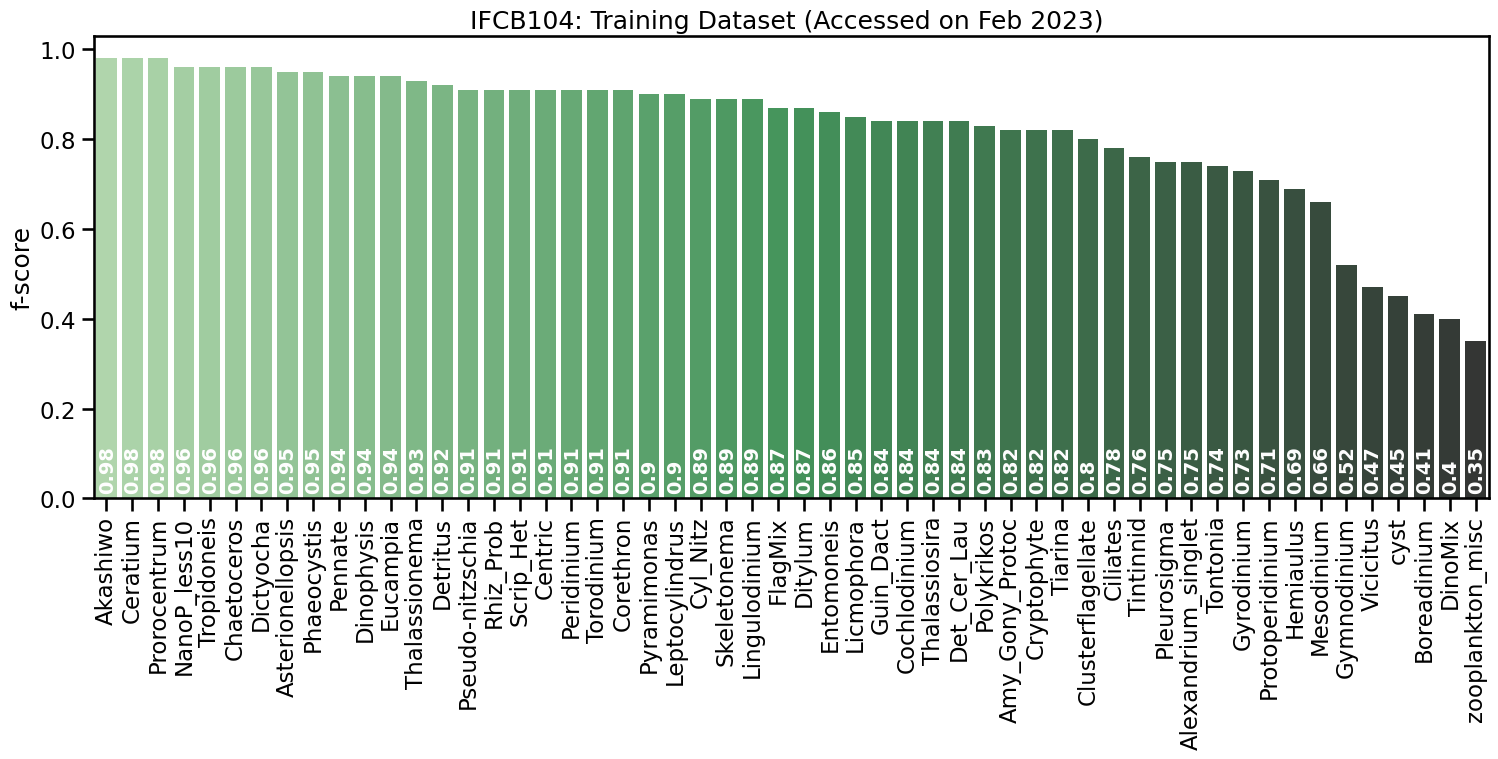

In [18]:
sns.set_context('talk')
fig, ax = plt.subplots()
fig.set_size_inches(18,6)

sns.barplot(x='Class Name', y='f1-score', data=results_df, palette="Greens_d")
ax.tick_params(axis='x', rotation=90)

ax.set_ylabel("f-score")
ax.set_xlabel("")
for i, count in enumerate(fscore):
    div_by = 1/len(fscore)
    ax.text(div_by*i + .003,.02,str(count),rotation='vertical', transform=ax.transAxes,c='w',weight='bold',size=14)

plt.title("IFCB104: Training Dataset (Accessed on Feb 2023) ")  
plt.savefig("./figures/54_f-score.png",dpi=300,bbox_inches='tight')

Class Name precision recall  f1-score  support
0              Akashiwo      0.98   0.98      0.98   6250.0
6              Ceratium      0.97   0.99      0.98    697.0
37         Prorocentrum      0.97   0.98      0.98   6505.0
31         NanoP_less10      0.95   0.96      0.96  10000.0
50          Tropidoneis      0.95   0.97      0.96     39.0
7           Chaetoceros      0.96   0.96      0.96   2649.0
16            Dictyocha      0.95   0.96      0.96    151.0
3      Asterionellopsis      0.92   0.97      0.95    401.0
34          Phaeocystis      0.97   0.93      0.95     30.0
32              Pennate      0.94   0.94      0.94   2388.0
18           Dinophysis      0.92   0.97      0.94    673.0
21             Eucampia      0.94   0.95      0.94    418.0
44        Thalassionema      0.93   0.92      0.93     61.0
15             Detritus      0.94   0.89      0.92   2411.0
39     Pseudo-nitzschia      0.97   0.86      0.91    344.0
41            Rhiz_Prob      0.90   0.93      0.91     94.0
42            Scrip_Het      0.89   0.92      0.91   1770.0
5               Centric      0.89   0.93      0.91   5629.0
33           Peridinium      0.88   0.94      0.91   1900.0
49           Torodinium      0.93   0.89      0.91     92.0
11            Corethron      0.95   0.87      0.91     63.0
40          Pyramimonas      0.86   0.95      0.90     38.0
27       Leptocylindrus      0.90   0.90      0.90    838.0
13             Cyl_Nitz      0.87   0.92      0.89    479.0
43          Skeletonema      0.95   0.84      0.89    171.0
29        Lingulodinium      0.94   0.85      0.89     39.0
22              FlagMix      0.90   0.84      0.87   1498.0
19              Ditylum      1.00   0.77      0.87     39.0
20           Entomoneis      0.96   0.78      0.86     65.0
28           Licmophora      0.84   0.87      0.85     30.0
23            Guin_Dact      0.91   0.79      0.84    110.0
10         Cochlodinium      0.92   0.77      0.84    827.0
45        Thalassiosira      0.81   0.87      0.84    548.0
14          Det_Cer_Lau      0.84   0.84      0.84    863.0
36           Polykrikos      0.72   0.97      0.83     30.0
2       Amy_Gony_Protoc      0.87   0.78      0.82    140.0
12          Cryptophyte      0.82   0.82      0.82    316.0
46              Tiarina      0.94   0.73      0.82     85.0
9     Clusterflagellate      0.86   0.74      0.80    160.0
8              Ciliates      0.79   0.77      0.78    648.0
47            Tintinnid      0.79   0.73      0.76     30.0
35          Pleurosigma      0.88   0.66      0.75     53.0
1   Alexandrium_singlet      0.76   0.74      0.75    861.0
48             Tontonia      0.80   0.69      0.74     94.0
25           Gyrodinium      0.93   0.60      0.73     45.0
38      Protoperidinium      0.77   0.67      0.71     30.0
26            Hemiaulus      0.82   0.60      0.69     30.0
30           Mesodinium      0.66   0.67      0.66    123.0
24          Gymnodinium      0.57   0.48      0.52    522.0
51            Vicicitus      0.82   0.33      0.47     43.0
52                 cyst      0.73   0.32      0.45     34.0
4           Boreadinium      0.53   0.33      0.41     30.0
17              DinoMix      0.42   0.38      0.40    339.0
53     zooplankton_misc      0.49   0.27      0.35    242.0

In [20]:
results_df = results_df.sort_values("traing_count",ascending=False)

sns.set_context('talk')
sns.set_style('white')
fig, ax = plt.subplots()
fig.set_size_inches(18,6)

sns.barplot(x='Class Name', y='traing_count', data=results_df, palette="Blues_d")
ax.tick_params(axis='x', rotation=90)
ax.set_yscale('log')

ax.set_ylabel("# Images")
ax.set_xlabel("")
for i, count in enumerate(results_df.traing_count.values):
    div_by = 1/len(nimages)
    ax.text(div_by*i + .003,.02,str(int(count)),rotation='vertical', transform=ax.transAxes,c='w',weight='bold',size=14)
# plt.savefig("./figures/54_training_count.png",dpi=300,bbox_inches='tight')

KeyError: 'training_count'

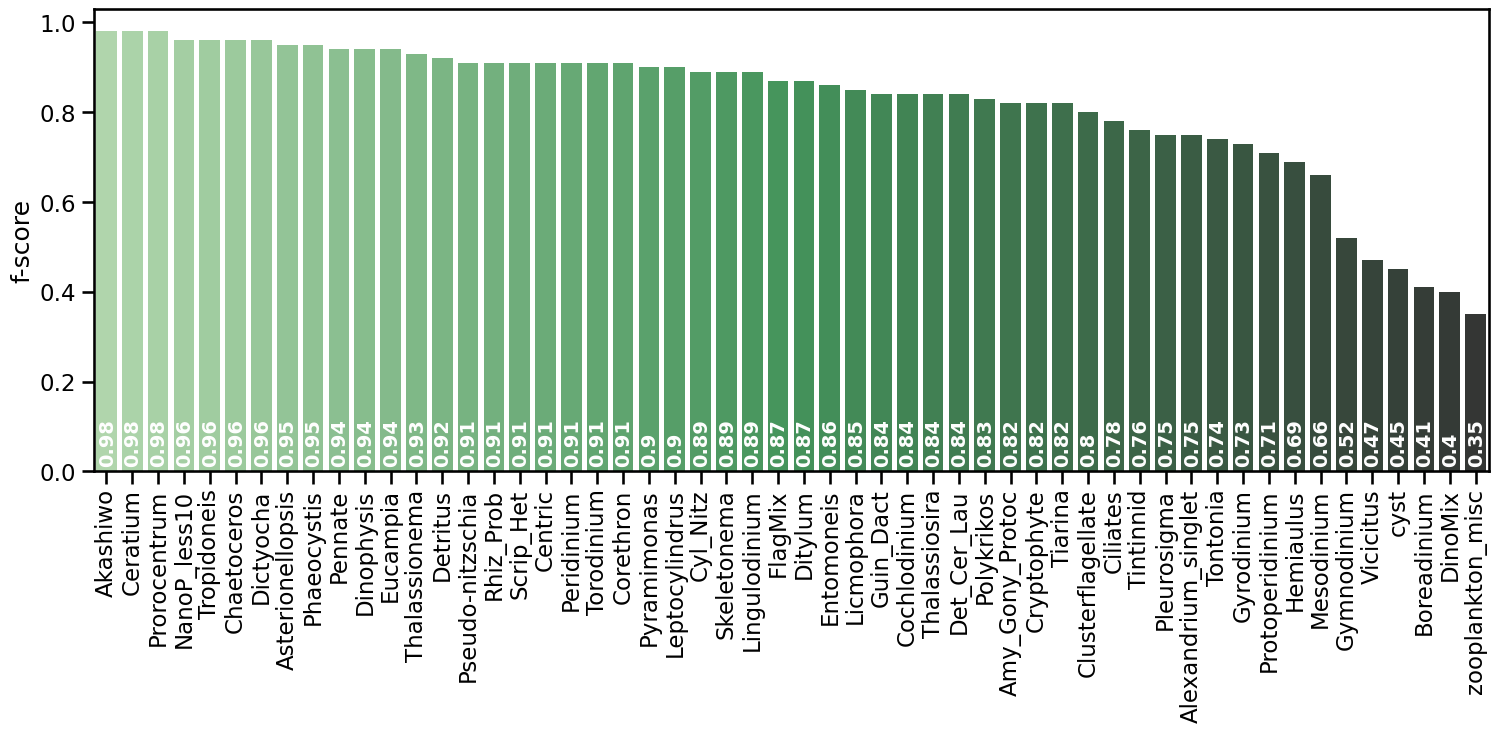

In [22]:
sns.set_context('talk')
fig, ax = plt.subplots()
fig.set_size_inches(18,6)

sns.barplot(x='Class Name', y='f1-score', data=results_df, palette="Greens_d")
ax.tick_params(axis='x', rotation=90)

ax.set_ylabel("f-score")
ax.set_xlabel("")
for i, count in enumerate(fscore):
    div_by = 1/len(fscore)
    ax.text(div_by*i + .003,.02,str(count),rotation='vertical', transform=ax.transAxes,c='w',weight='bold',size=14)

In [13]:
mat = pd.DataFrame(columns=cols, data = np.zeros((len(cols), len(cols))))
# mat = mat.append([0]*len(cols),i /gnore_index=True)
for i, true_class in enumerate(cols):
    t = df[df['class'] == true_class]
    tc = t['top_class'].values
    mat.iloc[i] = np.array([len(np.where(tc == col)[0]) for col in cols]) / len(tc)

In [14]:
mat.index = mat.columns

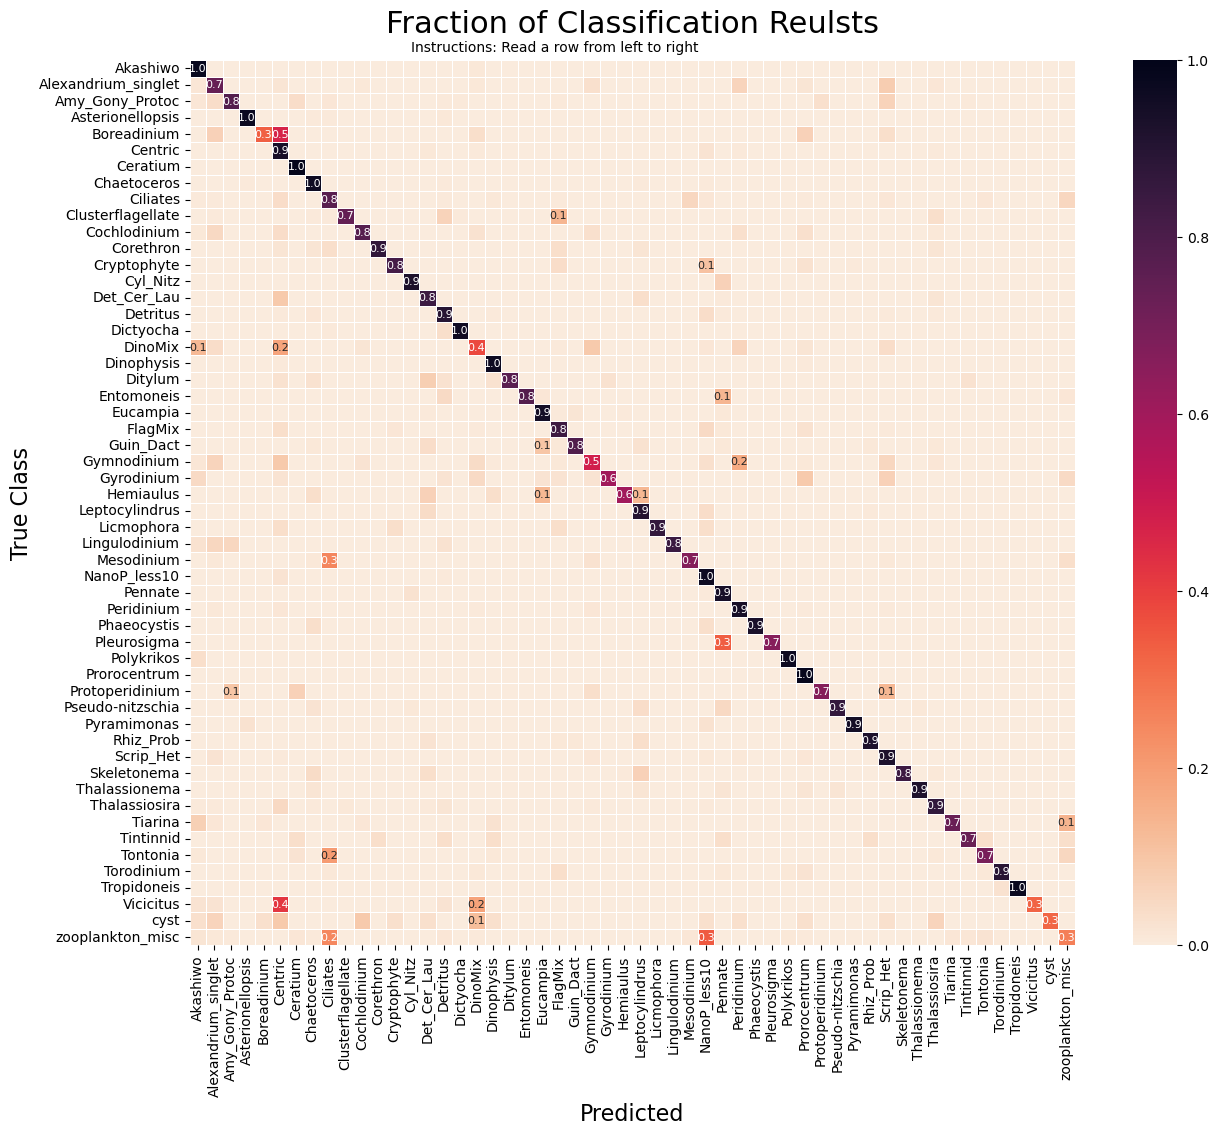

In [17]:
# sns.color_palette("rocket", as_cmap=True)
an = np.vectorize(lambda x: '' if x<0.1 else "{:.1f}".format(x))(mat.to_numpy())

fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(mat,ax=ax,cmap="rocket_r",square=True,vmin=0,vmax=1,linewidths=.5, annot=an, fmt = "",annot_kws={"size": 8})
ax.set_ylabel("True Class",size=16)
ax.set_xlabel("Predicted", size=16)
plt.subplots_adjust(top=.7)
plt.title("Fraction of Classification Reulsts", size=22, pad=20)
ax.text(x=.25,y=1.01, s="Instructions: Read a row from left to right",transform=ax.transAxes)
plt.savefig("./figures/54-class-prediction-matrix.png",dpi=350,bbox_inches='tight')

In [26]:
df.columns

Index(['Akashiwo', 'Alexandrium_singlet', 'Amy_Gony_Protoc',
       'Asterionellopsis', 'Boreadinium', 'Centric', 'Ceratium', 'Chaetoceros',
       'Ciliates', 'Clusterflagellate', 'Cochlodinium', 'Corethron',
       'Cryptophyte', 'Cyl_Nitz', 'Det_Cer_Lau', 'Detritus', 'Dictyocha',
       'DinoMix', 'Dinophysis', 'Ditylum', 'Entomoneis', 'Eucampia', 'FlagMix',
       'Guin_Dact', 'Gymnodinium', 'Gyrodinium', 'Hemiaulus', 'Leptocylindrus',
       'Licmophora', 'Lingulodinium', 'Mesodinium', 'NanoP_less10', 'Pennate',
       'Peridinium', 'Phaeocystis', 'Pleurosigma', 'Polykrikos',
       'Prorocentrum', 'Protoperidinium', 'Pseudo-nitzschia', 'Pyramimonas',
       'Rhiz_Prob', 'Scrip_Het', 'Skeletonema', 'Thalassionema',
       'Thalassiosira', 'Tiarina', 'Tintinnid', 'Tontonia', 'Torodinium',
       'Tropidoneis', 'Vicicitus', 'cyst', 'zooplankton_misc', 'fname', 'base',
       'class', 'top_prob', 'top_class', 'class_name'],
      dtype='object')

In [27]:
hab_cols = ['Pseudo-nitzschia', 'Alexandrium_singlet', 'Dinophysis', 'Lingulodinium', 'Cochlodinium', 'Prorocentrum', 'Gymnodinium', 'Protoperidinium']

In [28]:
habs_df = results_df.query("`Class Name` in @hab_cols")

In [29]:
habs_df

Class Name precision recall  f1-score  support
37         Prorocentrum      0.97   0.98      0.98   6505.0
18           Dinophysis      0.92   0.97      0.94    673.0
39     Pseudo-nitzschia      0.97   0.86      0.91    344.0
29        Lingulodinium      0.94   0.85      0.89     39.0
10         Cochlodinium      0.92   0.77      0.84    827.0
1   Alexandrium_singlet      0.76   0.74      0.75    861.0
38      Protoperidinium      0.77   0.67      0.71     30.0
24          Gymnodinium      0.57   0.48      0.52    522.0

__Count All Images used in training__

In [77]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import shutil

In [78]:
def count_files(subs):
    """Count the number of images in each folder"""
    num_files = []
    for sub in subs:
        # files = glob.glob(os.path.join("../training-images/alexis-via-axiom/raw", sub,"*.png"))
        # files = glob.glob(os.path.join("../training-images/synology-104-manual", sub, "*.png"))
        files = glob.glob(os.path.join("/Volumes/Extreme SSD/manual-classified-images/2022-06-01-sorted/train/", sub, "*.png"))
        num_files.append(len(files))
    return num_files
                        

In [79]:
# labels = os.listdir("../training-images/alexis-via-axiom/raw")
labels = os.listdir("/Volumes/Extreme SSD/manual-classified-images/2022-06-01-sorted/train/")
image_count = count_files(labels)
image_count, labels = zip(*sorted(zip(image_count, labels), reverse=True))
image_count = list(image_count)
# image_count = image_count[:57]
labels = list(labels)
# labels = labels[:57]
if labels[-1] == ".DS_Store":
    labels = labels[:-1]
    image_count = image_count[:-1]

In [85]:
df_count = pd.DataFrame(data={"class":labels,"counts":image_count})
df_count.sort_values('class')

class  counts
4              Akashiwo   40583
17  Alexandrium_singlet    3908
30      Amy_Gony_Protoc     792
27           Ash_glassy    1072
21     Asterionellopsis    2804
36        Bacteriastrum     452
25                Beads    1472
43          Boreadinium     296
2               Centric   65301
12             Ceratium    7592
5           Chaetoceros   37996
15             Ciliates    4660
31    Clusterflagellate     631
47      Coccolithophore     180
18         Cochlodinium    3654
42            Corethron     304
20          Cryptophyte    2884
6              Cyl_Nitz   22002
10          Det_Cer_Lau    8011
7              Detritus   12712
29            Dictyocha     925
16           Dinophysis    4287
45              Ditylum     232
44           Entomoneis     272
22             Eucampia    2664
14              FlagMix    5920
26            Guin_Dact    1154
11          Gymnodinium    7759
46           Gyrodinium     180
51            Hemiaulus     110
19       Leptocylindrus    3346
54           Licmophora      88
34        Lingulodinium     512
33           Mesodinium     550
0          NanoP_less10  471647
3               Pennate   57958
9            Peridinium    8032
56          Phaeocystis      76
40          Pleurosigma     364
28               Pollen    1013
52           Polykrikos     102
1          Prorocentrum   97626
55      Protoperidinium      80
23     Pseudo-nitzschia    2576
49          Pyramimonas     149
37            Rhiz_Prob     424
8             Scrip_Het    9476
24          Skeletonema    1626
35        Thalassionema     473
13        Thalassiosira    6054
41              Tiarina     348
50            Tintinnid     136
39             Tontonia     374
38           Torodinium     374
32          Tropidoneis     606
48            Vicicitus     169
53                 cyst      88

In [89]:
results_df = results_df.sort_values("Class Name")
results_df['traiing_count'] = df_count.sort_values('class')['counts']
results_df.head()

Class Name precision recall  f1-score  support  traing_count
0             Akashiwo      0.98   0.99      0.99   5074.0        471647
1  Alexandrium_singlet      0.81   0.71      0.76    489.0         97626
2      Amy_Gony_Protoc      0.71   0.75      0.73     99.0         65301
3           Ash_glassy      0.62   0.40      0.48    134.0         57958
4     Asterionellopsis      0.96   0.95      0.96    351.0         40583

/var/folders/wg/5wjdpvd518dft0bjkj1t1s1h0000gn/T/ipykernel_63274/1822850385.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0,1E6)


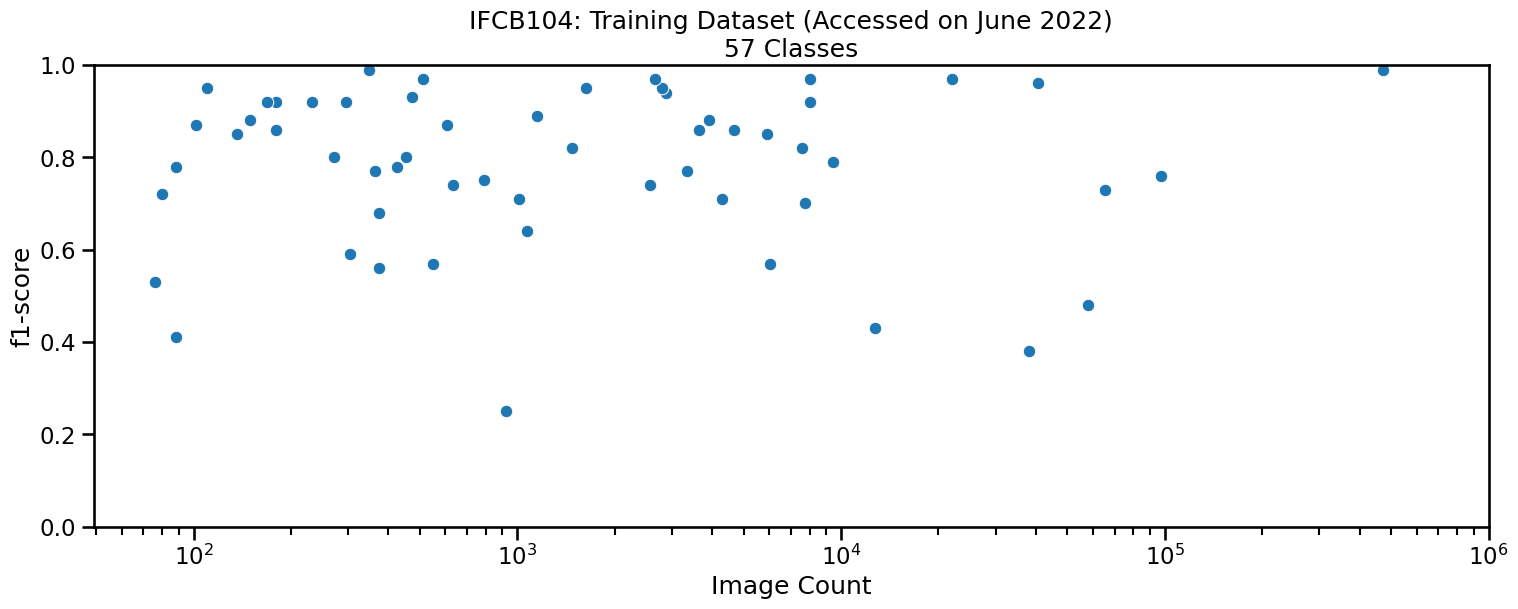

In [120]:
# sns.set_theme(style="white")

import matplotlib
matplotlib.rc_file_defaults()
sns.set_context('talk')

fig, ax = plt.subplots()
fig.set_size_inches(18,6)

sns.scatterplot(x='traing_count',y='f1-score',data=results_df)
ax.set_xscale('log')
ax.set_ylim(0,1)
ax.set_xlim(0,1E6)

ax.set_xlabel("Image Count")
plt.title("IFCB104: Training Dataset (Accessed on June 2022)\n{} Classes".format(len(image_count)))  
plt.savefig("./figures/fscore_count_57class.png", dpi=300, bbox_inches='tight')

## Mountain plot of reults of HABS ##

In [109]:
plot_data = mat.loc[hab_cols]
plot_data = plot_data.melt()
plot_data.head()

variable     value
0  Akashiwo  0.000000
1  Akashiwo  0.034765
2  Akashiwo  0.005587
3  Akashiwo  0.046154
4  Akashiwo  0.024017

/Users/patrick/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/patrick/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/patrick/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/patrick/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/patrick/opt/anaconda3/lib/python3.9/site-pack

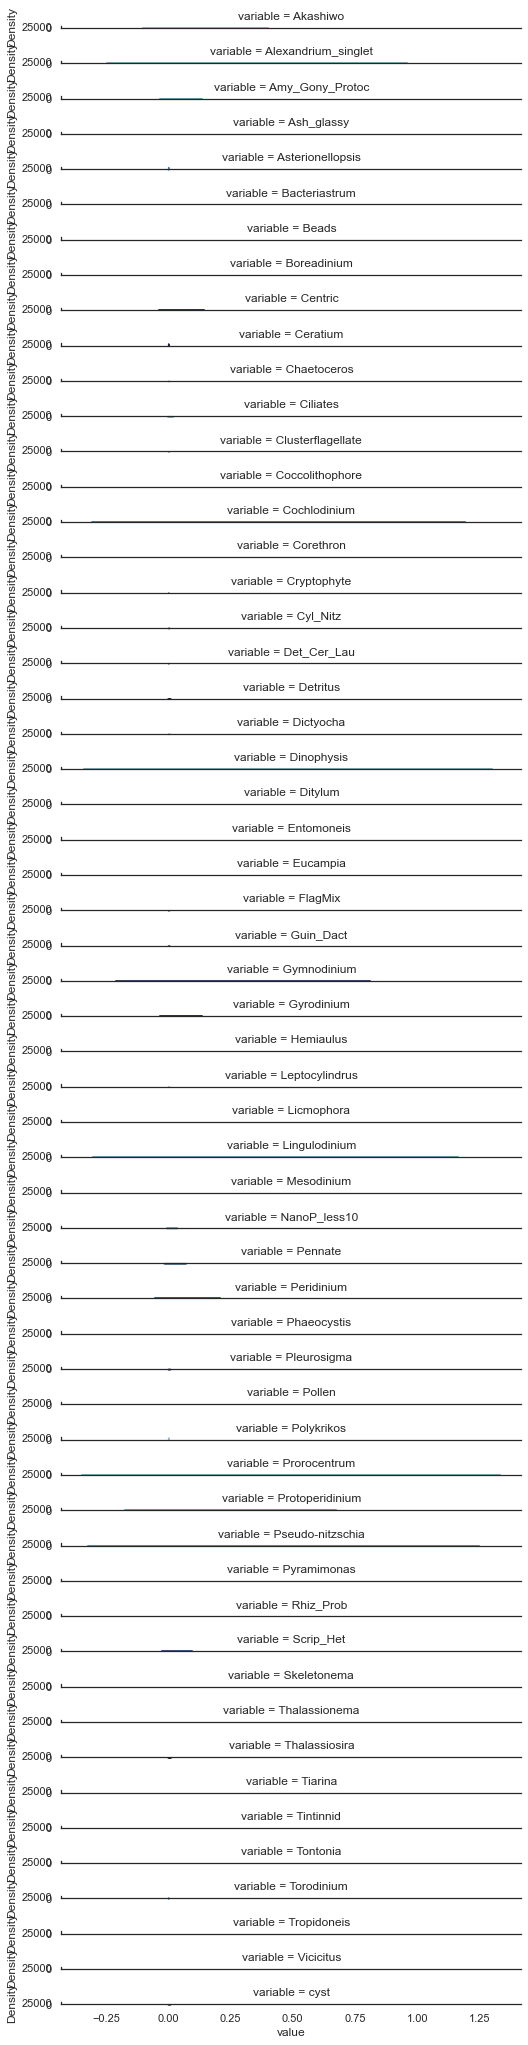

In [123]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
plot_data

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_data, row="variable", hue="variable", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# # passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "x")

# # Set the subplots to overlap
# g.figure.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)

In [124]:
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

In [125]:
df

x  g
0    64.038123  A
1    66.147050  B
2    66.370011  C
3    68.791019  D
4    70.583534  E
..         ... ..
495  69.358022  F
496  72.212877  G
497  70.474247  H
498  73.251022  I
499  74.461828  J

[500 rows x 2 columns]

## Checking the number within each group ##

In [19]:
import os
import glob

In [35]:
val_dir = "/Volumes/Extreme SSD/manual-classified-images/2022-06-01-sorted/test/*"
base = []
count = []
for b in sorted(glob.glob(val_dir)):
    count.append(len(glob.glob(os.path.join(b,"*.png"))))
    base.append(os.path.basename(b))

In [44]:
for b,c in zip(base,count):
    fcount = fnames.groupby('class').count()['fname'][b]
    print("{} -- files: {} -- filecount: {}".format(b,c,fcount))

Akashiwo -- files: 5074 -- filecount: 5074
Alexandrium_singlet -- files: 489 -- filecount: 489
Amy_Gony_Protoc -- files: 99 -- filecount: 99
Ash_glassy -- files: 134 -- filecount: 134
Asterionellopsis -- files: 351 -- filecount: 351
Bacteriastrum -- files: 57 -- filecount: 57
Beads -- files: 185 -- filecount: 185
Boreadinium -- files: 38 -- filecount: 38
Centric -- files: 8164 -- filecount: 8164
Ceratium -- files: 949 -- filecount: 949
Chaetoceros -- files: 4751 -- filecount: 4751
Ciliates -- files: 584 -- filecount: 584
Clusterflagellate -- files: 80 -- filecount: 80
Coccolithophore -- files: 23 -- filecount: 23
Cochlodinium -- files: 458 -- filecount: 458
Corethron -- files: 39 -- filecount: 39
Cryptophyte -- files: 362 -- filecount: 362
Cyl_Nitz -- files: 2751 -- filecount: 2751
Det_Cer_Lau -- files: 1002 -- filecount: 1002
Detritus -- files: 1589 -- filecount: 1589
Dictyocha -- files: 117 -- filecount: 117
Dinophysis -- files: 537 -- filecount: 537
Ditylum -- files: 30 -- filecount

In [47]:
82493

82493